## Getting data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the base directory
base_dir = r'.\csv'

# Define the structure and mapping of files to patient IDs
chum_files = {
    r"landmarks\chum\landmark_distances_mm_1.csv": 1,
    r"landmarks\chum\landmark_distances_mm_3.csv": 3,
    r"landmarks\chum\landmark_distances_mm_4.csv": 4,
    r"landmarks\chum\landmark_distances_mm_5.csv": 5,
    r"landmarks\chum\landmark_distances_mm_11.csv": 11,
    r"landmarks\chum\landmark_distances_mm_14.csv": 14
}

# olivetti_files = {
#     r"landmarks\olivetti\landmark_distances_mm_1_olivetti.csv": 'S1',
#     r"landmarks\olivetti\landmark_distances_mm_2_olivetti.csv": 'S2',
#     r"landmarks\olivetti\landmark_distances_mm_6_olivetti.csv": 'S6'
# }

hmr_files = {
    r"hmr/distances/hmr_001_landmark.csv": 1,
    r"hmr/distances/hmr_002_landmark.csv": 2,
    r"hmr/distances/hmr_003_landmark.csv": 3,
    r"hmr/distances/hmr_004_landmark.csv": 4,
    r"hmr/distances/hmr_005_landmark.csv": 5,
    r"hmr/distances/hmr_006_landmark.csv": 6,
    r"hmr/distances/hmr_007_landmark.csv": 7,
    r"hmr/distances/hmr_008_landmark.csv": 8,
    r"hmr/distances/hmr_019_landmark.csv": 19,
    r"hmr/distances/hmr_027_landmark.csv": 27

}
olivetti_files = {
    r"hmr/distances/soggetto_007_landmark.csv": 'S7',
    r"hmr/distances/soggetto_008_landmark.csv": 'S8',
    r"hmr/distances/soggetto_009_landmark.csv": 'S9'
}

# Load the metadata files
metadata_files = {
    "INFOclinical_HN_Version2_30may2018_Metadata.csv": pd.read_csv(os.path.join(base_dir, r"metadata\INFOclinical_HN_Version2_30may2018_Metadata.csv")),
    "elenco_soggetti_operazioni_olivetti.xlsx": pd.read_excel(os.path.join(base_dir, r"metadata\elenco_soggetti_operazioni_olivetti.xlsx"))
}

# Create a mapping from patient number to patient ID for CHUM
chum_patient_id_mapping = {
    1: 'HN-CHUM-001',
    3: 'HN-CHUM-003',
    4: 'HN-CHUM-004',
    5: 'HN-CHUM-005',
    11: 'HN-CHUM-011',
    14: 'HN-CHUM-014'
}

hmr_patient_id_mapping = {
    1: 'HN-HMR-001',
    2: 'HN-HMR-002',
    3: 'HN-HMR-003',
    4: 'HN-HMR-004',
    5: 'HN-HMR-005',
    6: 'HN-HMR-006',
    7: 'HN-HMR-007',
    8: 'HN-HMR-008',
    19: 'HN-HMR-019',
    27: 'HN-HMR-027'
}
# Function to load CSV files from a list and add PatientID
def load_files(file_mapping, patient_id_mapping):
    dataframes = {}
    for file, patient_num in file_mapping.items():
        file_path = os.path.join(base_dir, file)
        df = pd.read_csv(file_path)
        df['PatientID'] = patient_id_mapping[patient_num]
        dataframes[file] = df
    return dataframes

# Load data for CHUM category
hmr_data = load_files(hmr_files, hmr_patient_id_mapping)

# Display column names for Olivetti metadata to find the correct ID column
olivetti_metadata = metadata_files["elenco_soggetti_operazioni_olivetti.xlsx"]
"""
# Debug print statements
print("\nColumn names for Olivetti metadata:")
print(olivetti_metadata.columns)
"""

# Function to load Olivetti files and add PatientID
def load_olivetti_files(file_mapping):
    dataframes = {}
    for file, patient_id in file_mapping.items():
        file_path = os.path.join(base_dir, file)
        df = pd.read_csv(file_path)
        df['PatientID'] = patient_id
        dataframes[file] = df
    return dataframes

# Load data for Olivetti category
olivetti_data = load_olivetti_files(olivetti_files)

# Merge metadata with landmark distances for CHUM
hmr_metadata = metadata_files["INFOclinical_HN_Version2_30may2018_Metadata.csv"]
for name, df in hmr_data.items():
    merged_df = df.merge(hmr_metadata, how='left', left_on='PatientID', right_on='Patient #')
    hmr_data[name] = merged_df
    """
    # Debug print statements
    print(f"\nMerged Data for {name}:")
    print(merged_df.head())
    print(f"\nSummary Statistics for {name}:")
    print(merged_df.describe())
    """

# Merge metadata with landmark distances for Olivetti
for name, df in olivetti_data.items():
    merged_df = df.merge(olivetti_metadata, how='left', left_on='PatientID', right_on='Pazienti')
    olivetti_data[name] = merged_df
    """
    # Debug print statements
    print(f"\nMerged Data for {name}:")
    print(merged_df.head())
    print(f"\nSummary Statistics for {name}:")
    print(merged_df.describe())
    """


## Plots on original data distribution

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


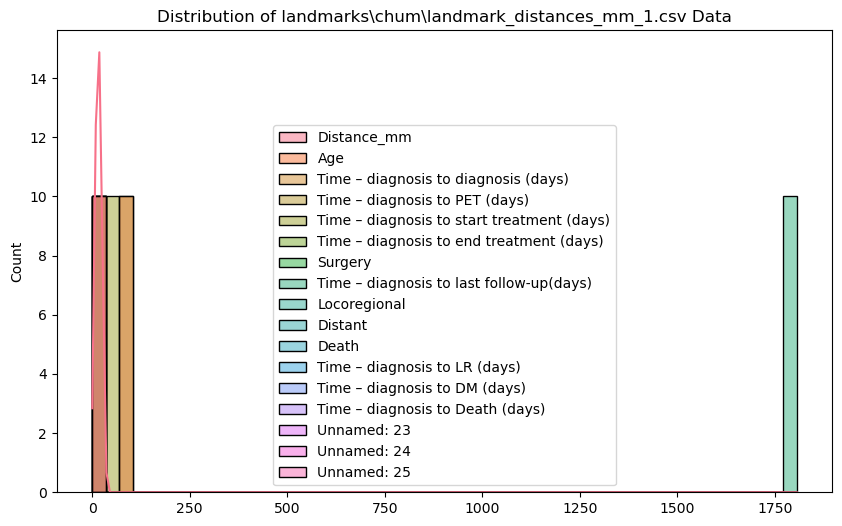

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


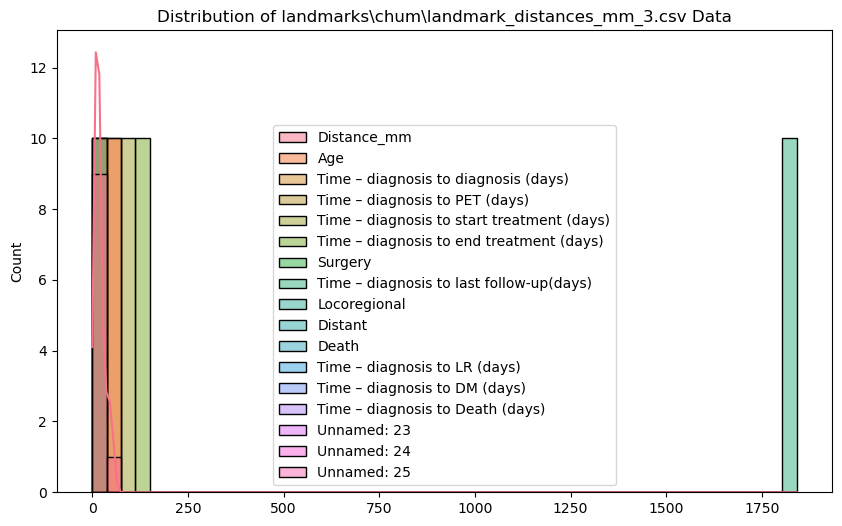

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


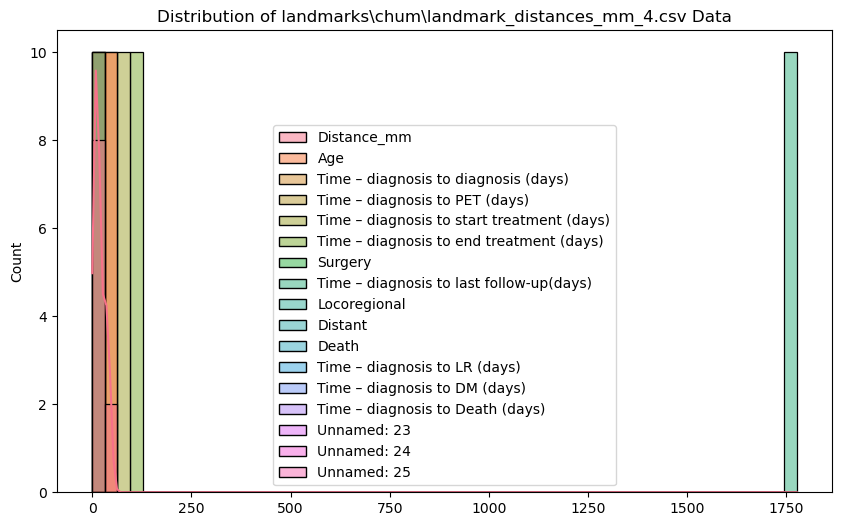

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


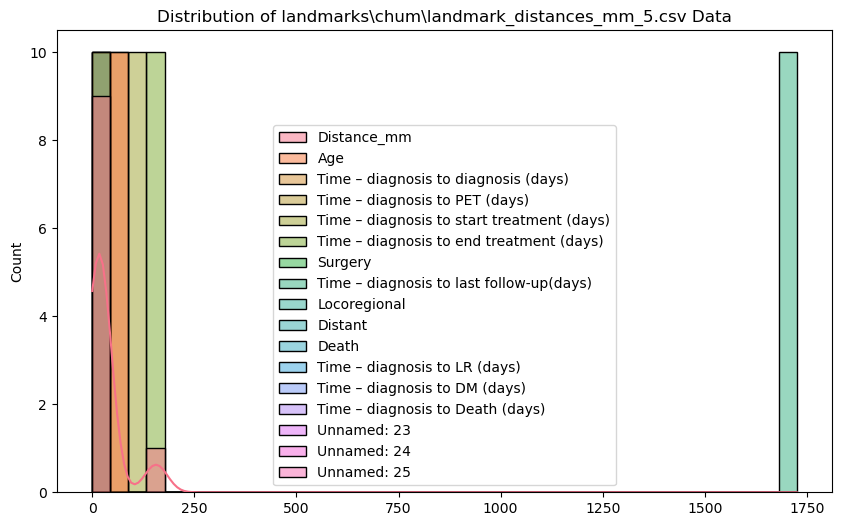

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


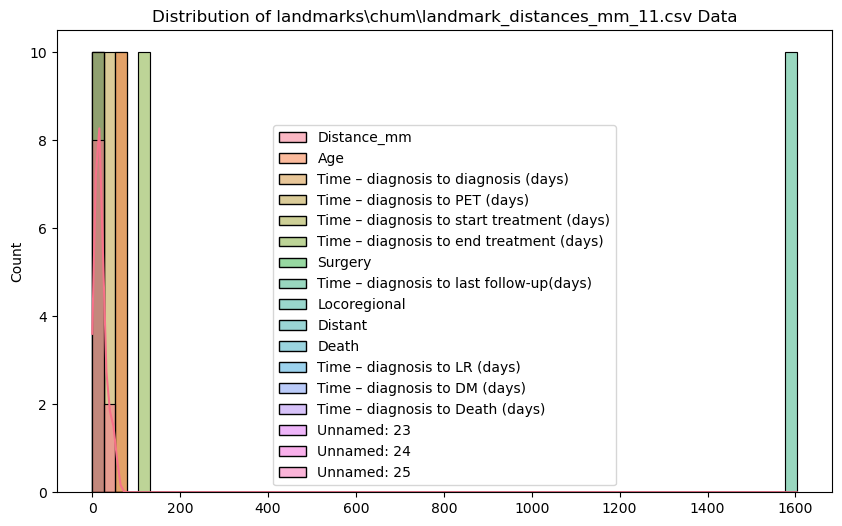

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


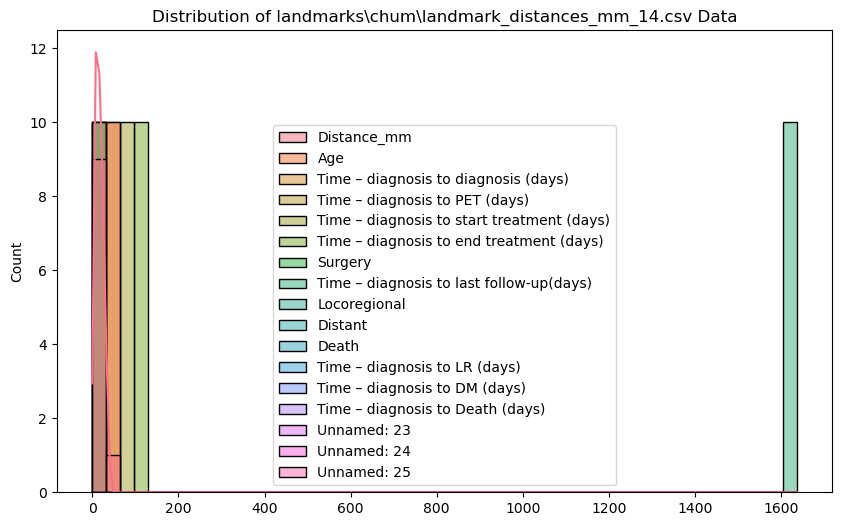

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


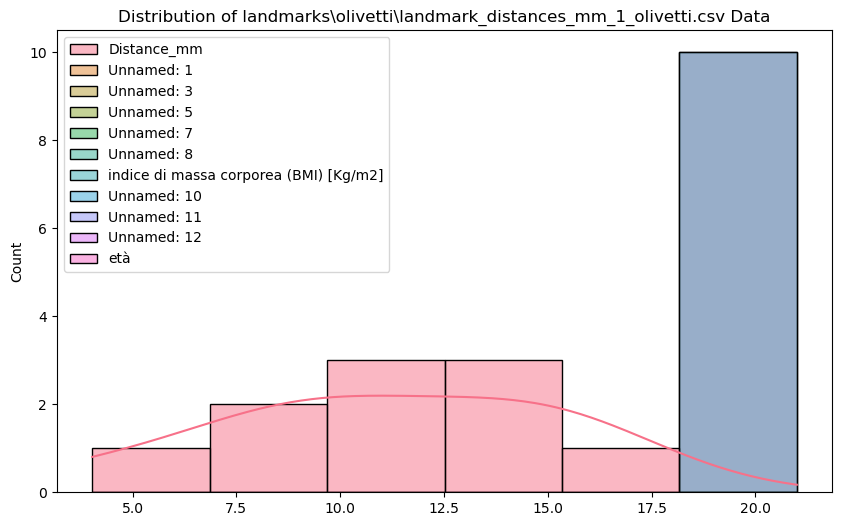

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


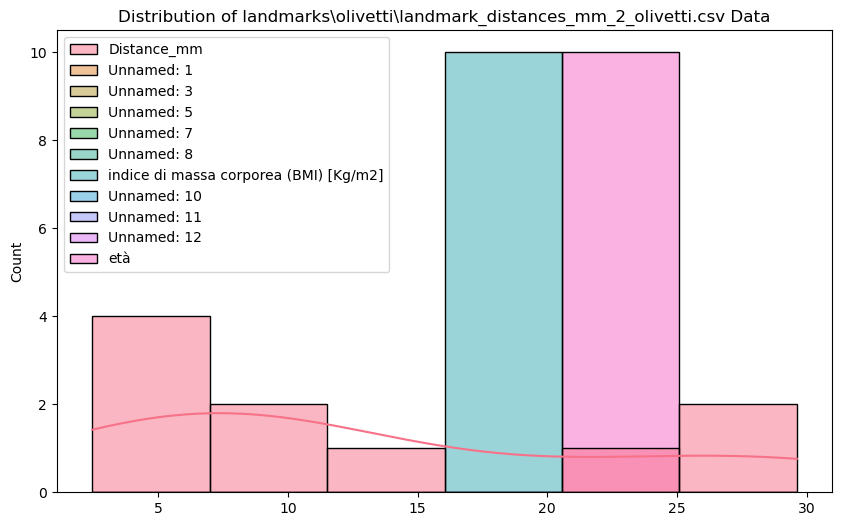

c:\Users\tony0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


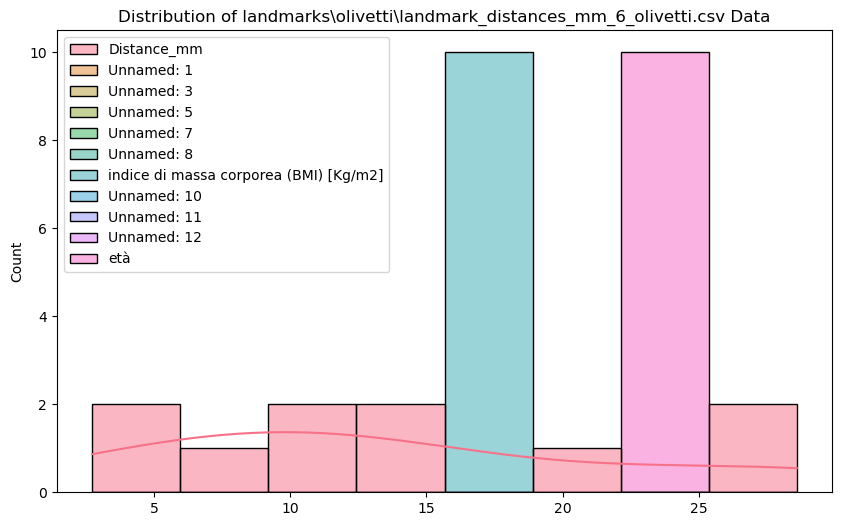

"\n# Plot correlation matrices\nfor name, df in chum_data.items():\n    numeric_df = df.select_dtypes(include='number')\n    correlation_matrix = numeric_df.corr()\n    plt.figure(figsize=(12, 8))\n    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')\n    plt.title(f'Correlation Matrix for {name}')\n    plt.show()\n\nfor name, df in olivetti_data.items():\n    numeric_df = df.select_dtypes(include='number')\n    correlation_matrix = numeric_df.corr()\n    plt.figure(figsize=(12, 8))\n    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')\n    plt.title(f'Correlation Matrix for {name}')\n    plt.show()\n"

In [2]:
# Plot distributions for CHUM datasets
for name, df in hmr_data.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(df.select_dtypes(include='number'), kde=True)
    plt.title(f'Distribution of {name} Data')
    plt.show()

# Plot distributions for Olivetti datasets
for name, df in olivetti_data.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(df.select_dtypes(include='number'), kde=True)
    plt.title(f'Distribution of {name} Data')
    plt.show()

"""
# Plot correlation matrices
for name, df in chum_data.items():
    numeric_df = df.select_dtypes(include='number')
    correlation_matrix = numeric_df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for {name}')
    plt.show()

for name, df in olivetti_data.items():
    numeric_df = df.select_dtypes(include='number')
    correlation_matrix = numeric_df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for {name}')
    plt.show()
"""


## Correlations

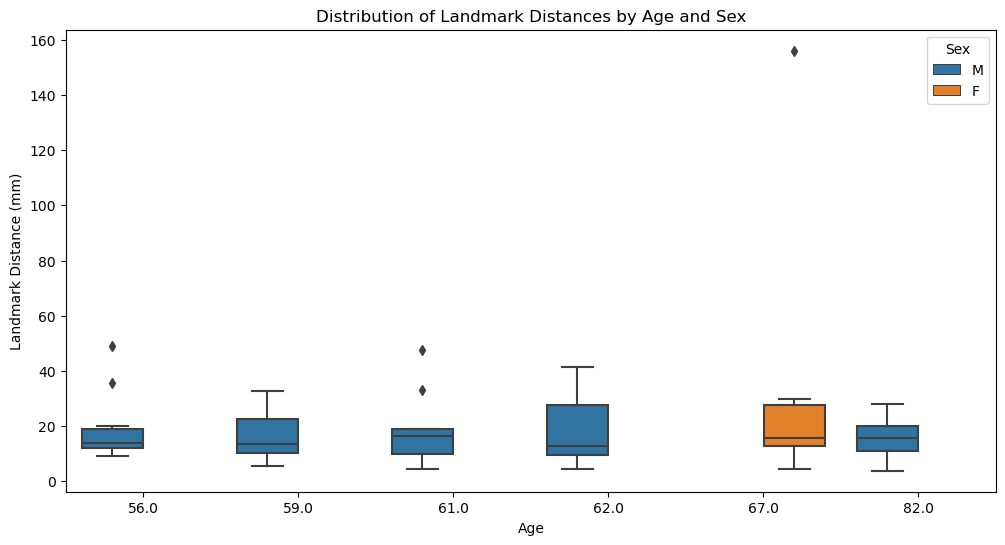

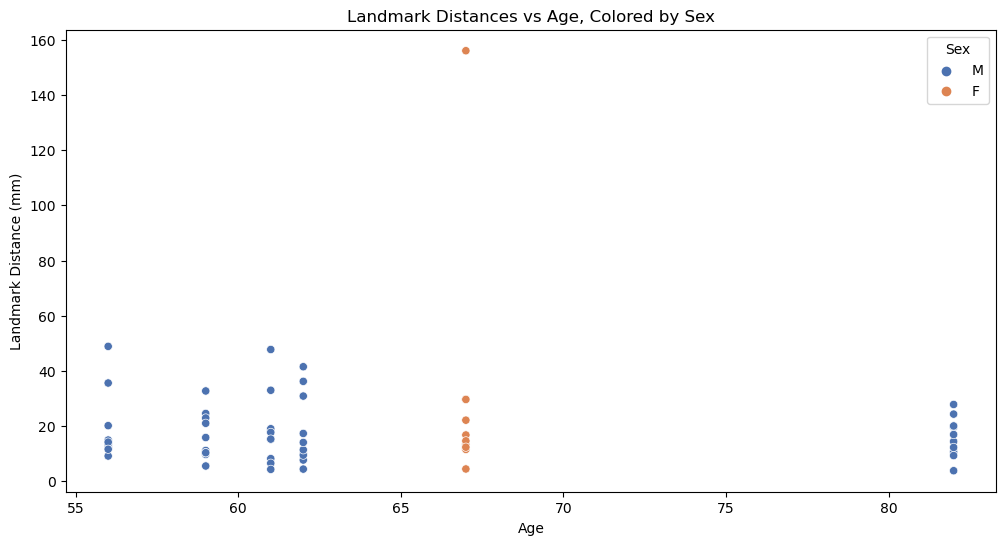

In [3]:
# Combine all CHUM dataframes
combined_chum_data = pd.concat(chum_data.values())

# Combine all Olivetti dataframes
combined_olivetti_data = pd.concat(olivetti_data.values())

# Combine CHUM and Olivetti dataframes into one
combined_data = pd.concat([combined_chum_data, combined_olivetti_data], ignore_index=True)

# Display the combined dataframe for debug purposes
# print(combined_data.head())

# Group by age and sex and calculate summary statistics
grouped_stats = combined_data.groupby(['Age', 'Sex'])['Distance_mm'].describe()

# Display the summary statistics for debug purposes
# print(grouped_stats)

# Box plot for distribution of distances by age and sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Distance_mm', hue='Sex', data=combined_data)
plt.title('Distribution of Landmark Distances by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Landmark Distance (mm)')
plt.legend(title='Sex')
plt.show()

# Scatter plot for relationship between age and landmark distances
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Distance_mm', hue='Sex', data=combined_data, palette='deep')
plt.title('Landmark Distances vs Age, Colored by Sex')
plt.xlabel('Age')
plt.ylabel('Landmark Distance (mm)')
plt.legend(title='Sex')
plt.show()



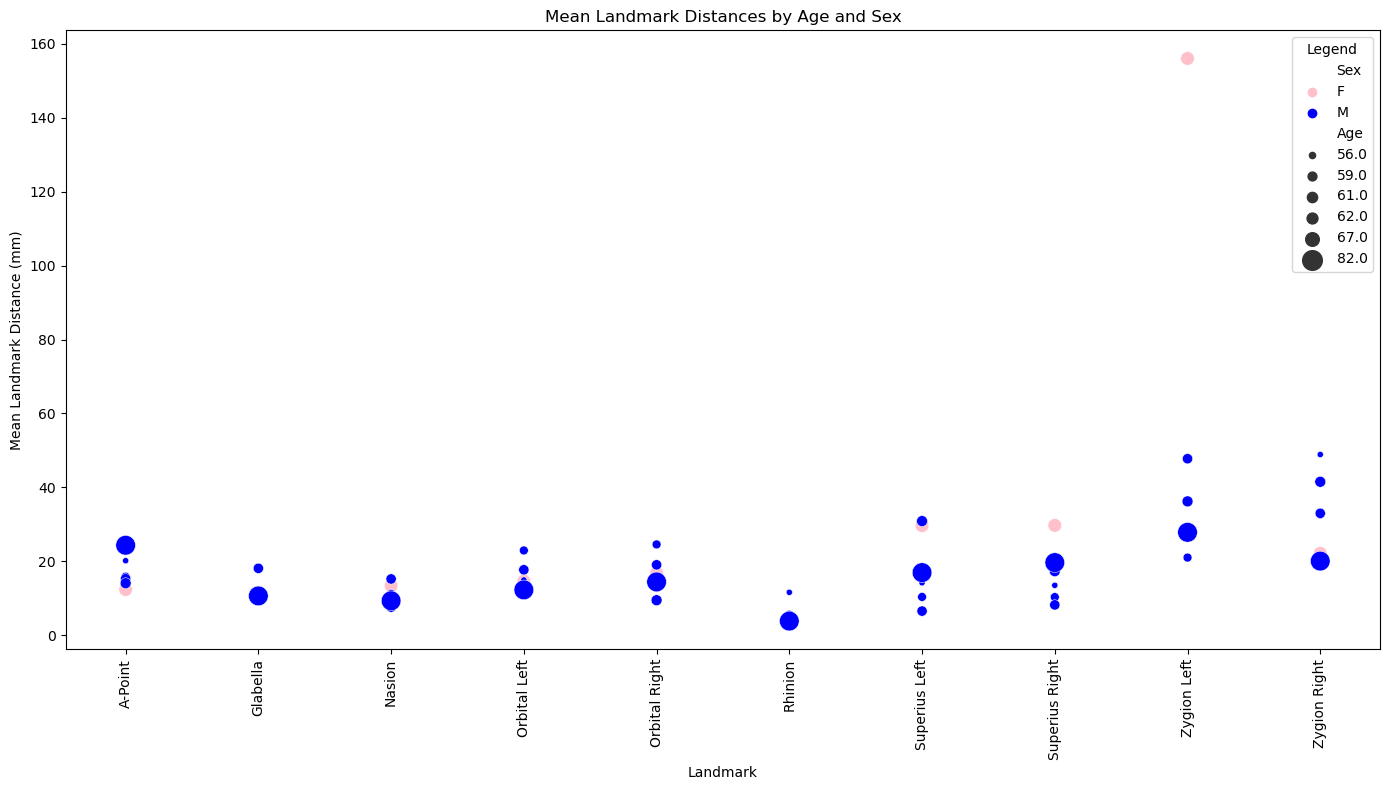

In [4]:
# Extract unique landmark points
landmarks = combined_data['Landmark'].unique()

# Calculate mean distances for each landmark
mean_distances = combined_data.groupby(['Landmark', 'Sex', 'Age']).agg({'Distance_mm': 'mean'}).reset_index()

# Create scatter plot with landmarks on the x-axis
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Landmark', y='Distance_mm', hue='Sex', size='Age', data=mean_distances, palette={'F': 'pink', 'M': 'blue'}, sizes=(20, 200), legend='full')
plt.title('Mean Landmark Distances by Age and Sex')
plt.xlabel('Landmark')
plt.ylabel('Mean Landmark Distance (mm)')
plt.legend(title='Legend')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()